In [1]:
from lib.get_L2 import get_M, dens_gauss_shift,get_extension,get_Bais
import numpy as np
import scipy as sp
import pandas as pd
import ot
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from multiprocessing import Pool
import glob

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'cmr10','serif':['Computer Modern Roman'],'size':'8'})
plt.rc('axes.formatter', use_mathtext=True)
centm=1/2.54

# Fig 1

In [3]:
seed = np.random.SeedSequence()
gen = np.random.Generator(np.random.MT19937(seed))

In [4]:
N = 1000
std = .05
jump = .3
dim = 1
jump_prob = .5
ve = .01
x_e = y_e = np.linspace(0,1,1000,endpoint=False)
M0 = dens_gauss_shift(*np.meshgrid(y_e,x_e), jump, std, jump_prob)
M1 = dens_gauss_shift(*np.meshgrid(y_e,x_e), jump, np.sqrt(std**2 + ve), jump_prob)
M10 = get_M(gen,10,std,jump,ve)
M100 = get_M(gen,100,std,jump,ve)
M1000 = get_M(gen,1000,std,jump,ve)

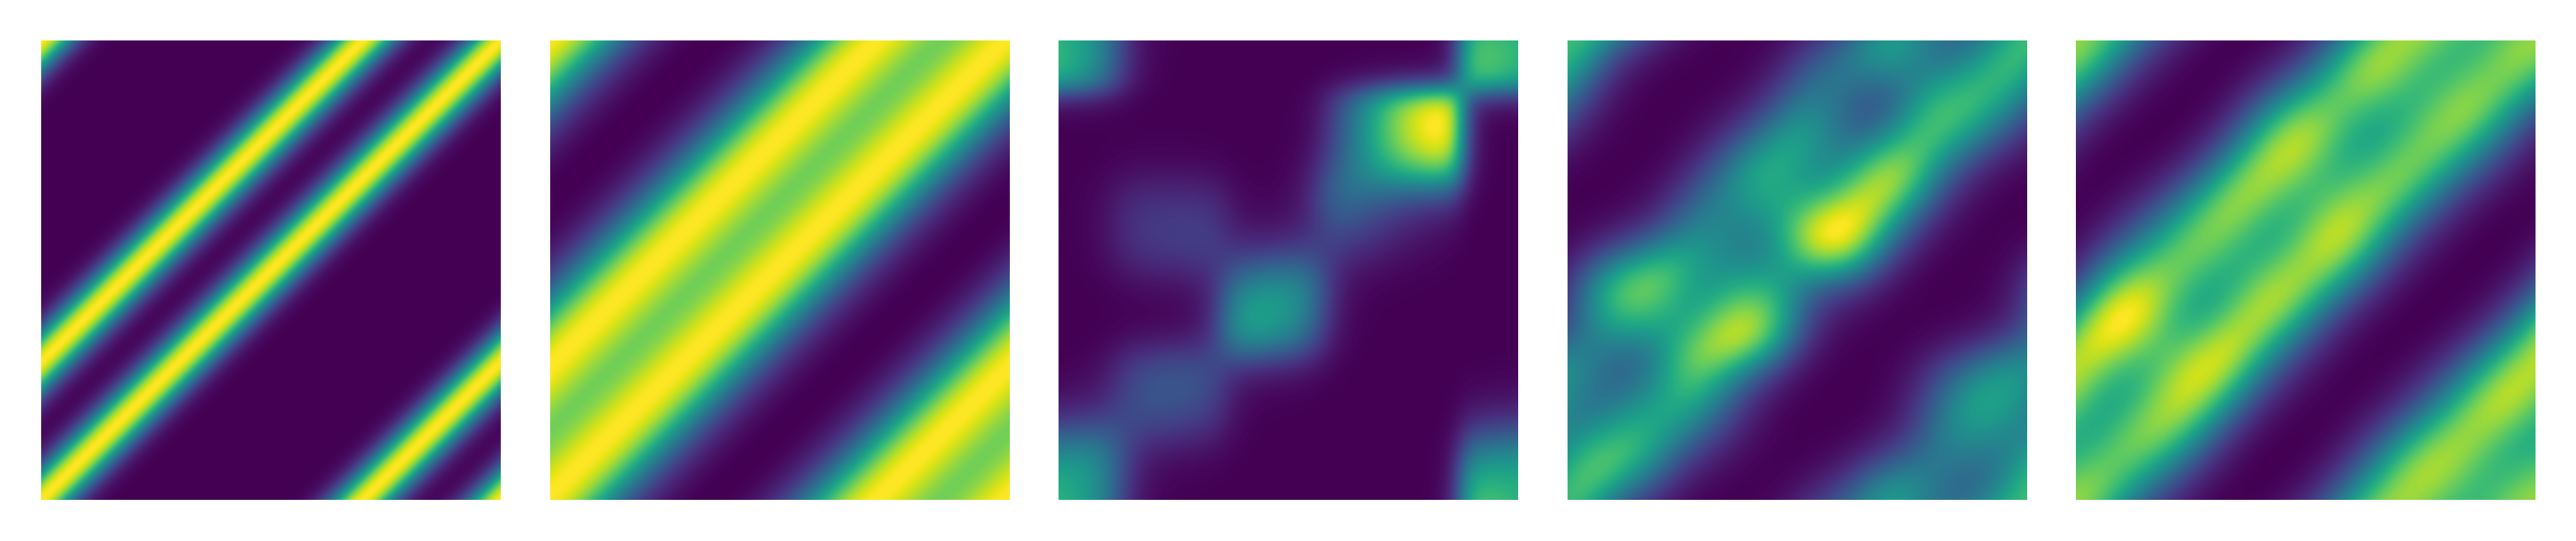

In [6]:
Mlist = [M0,M1,M10,M100,M1000]
fig, axs = plt.subplots(ncols=5, figsize=(16*centm,16/4*centm),dpi=600,facecolor="w") 
for i,M in zip([0,1,2,3,4],Mlist):
    axs[i].imshow(M,origin='lower')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

# Fig 2

In [4]:
res = {"L2" : [],
    "L2_true" : [],
    "N" : [],
    "std" : [],
    "jump" : [],
    "jump_prob" : [],
    "ve" : [],
    "dim" : []
    }
res = pd.DataFrame(res)

In [5]:
files = glob.glob("./Given_results_torus/*")
#files = glob.glob("./results_torus/*")

In [6]:
def read_res(A):
    return pd.read_csv(A)
if __name__ == '__main__':
    with Pool(16) as p:
        dfList = p.map(read_res,files)

In [7]:
res = []
for F in dfList:
    res.append(F)
res = pd.concat(res, axis=0, ignore_index=True)

In [8]:
D2a = res[(res['std'] == .01)&(res['dim'] == 1)]
D2b = res[(res['ve'] == .001)&(res['dim'] == 1)]

In [11]:
epsList = np.logspace(-3.7,1,48)
def get_l2a(eps):
    return get_Bais(std = .01,jump = .3 ,jump_prob = .5,ve = eps,Res = 1000)
def get_l2b(eps):
    return get_Bais(std = .025,jump = .3 ,jump_prob = .5,ve = eps,Res = 1000)
def get_l2c(eps):
    return get_Bais(std = .05,jump = .3 ,jump_prob = .5,ve = eps,Res = 1000)

In [12]:
tt = time.time()
if __name__ == '__main__':
    with Pool(16) as p:
        l2a = p.map(get_l2a,epsList)
        l2b = p.map(get_l2b,epsList)
        l2c = p.map(get_l2c,epsList)
print(time.time() - tt)

21.504440546035767


<AxesSubplot: xlabel='N', ylabel='L2'>

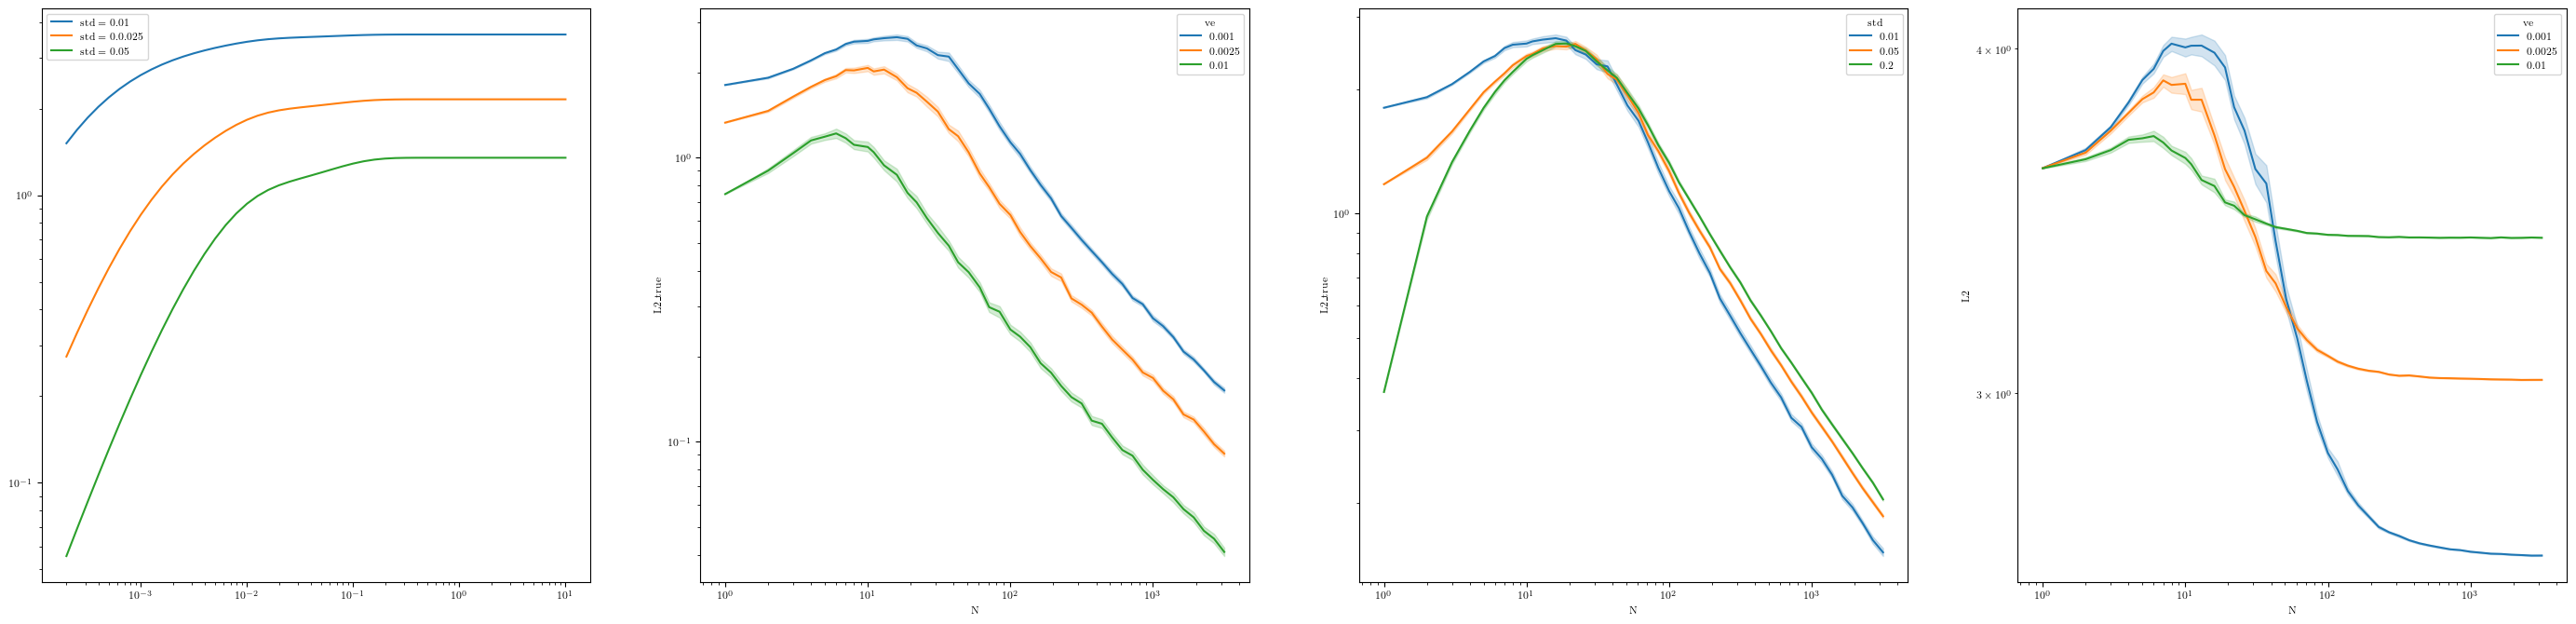

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize = (35,8))
for a in ax:
    a.set_xscale('log')
    a.set_yscale('log')
ax[0].plot(epsList,l2a,label='std = 0.01', color = sns.color_palette("tab10")[0])
ax[0].plot(epsList,l2b,label='std = 0.0.025',color = sns.color_palette("tab10")[1])
ax[0].plot(epsList,l2c,label='std = 0.05', color = sns.color_palette("tab10")[2])
ax[0].legend()
sns.lineplot(data = D2a,x = 'N', y = 'L2_true', hue = 've', ax = ax[1],palette = 'tab10')
sns.lineplot(data = D2b,x = 'N', y = 'L2_true', hue = 'std', ax = ax[2],palette = 'tab10')
sns.lineplot(data = D2a,x = 'N', y = 'L2', hue = 've', ax = ax[3],palette = 'tab10')

# Fig 3

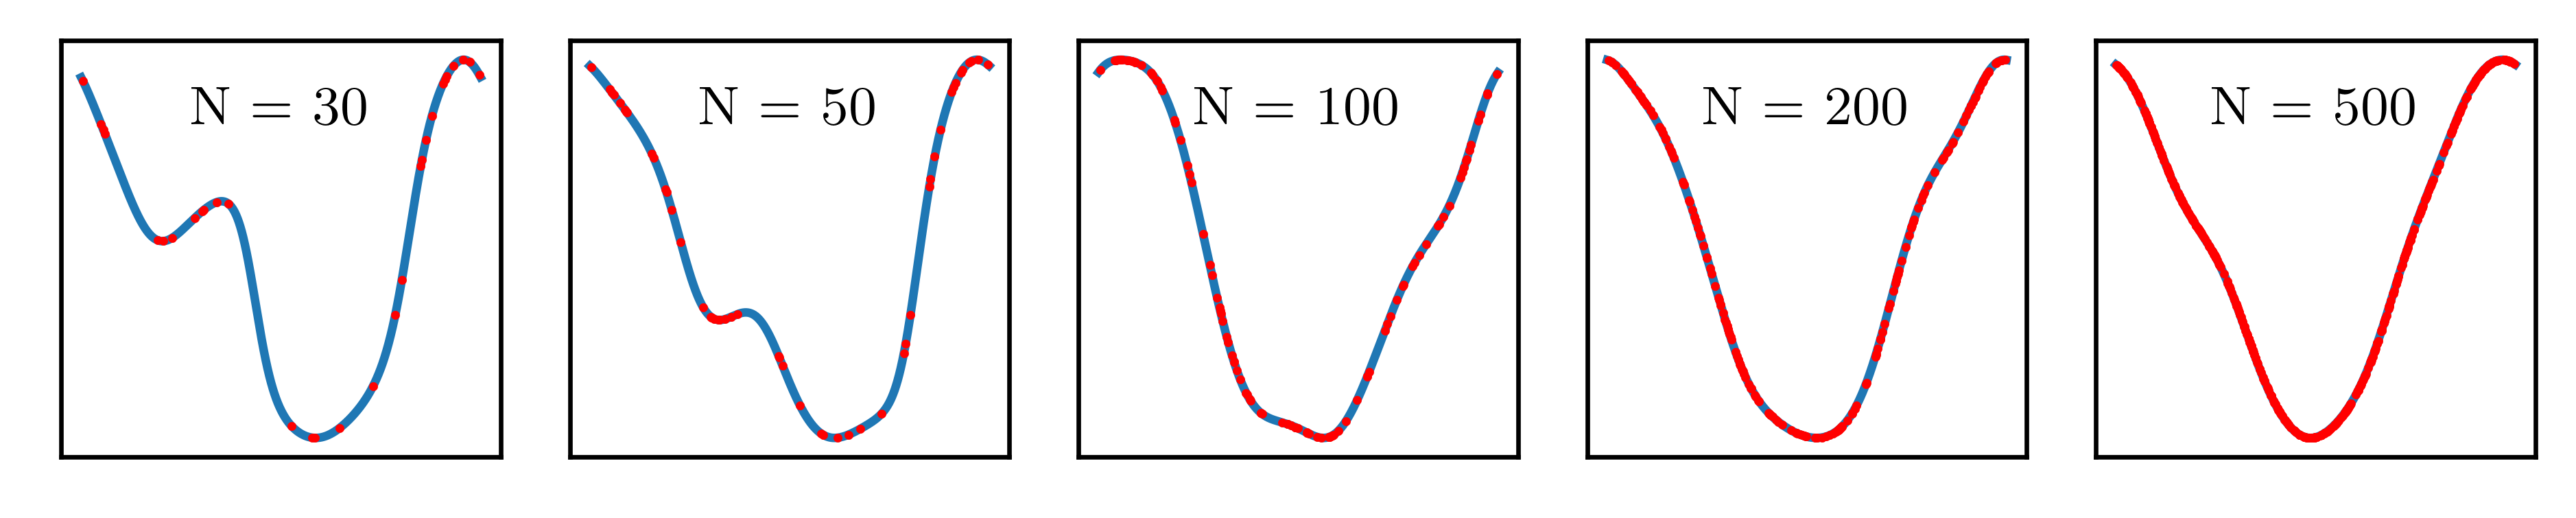

In [14]:
sd = 820
seed = np.random.SeedSequence(sd)
std = 0.01
jump = 0.3
ve = 0.01
fig,ax = plt.subplots(ncols=5,layout='tight', figsize=(16*centm,3.3*centm),dpi=600,facecolor="w")
titles = ['N = 30','N = 50', 'N = 100', 'N = 200', 'N = 500']
Nlist = [30,50,100,200,500]
for i,a in enumerate(ax):
    r1,r2,r3,r4 = get_extension(seed,Nlist[i], std, jump, ve)
    a.plot(r1,r2,zorder = 0)
    a.scatter(r3,r4, s = .3,zorder = 1,c = 'r')
    a.axes.get_xaxis().set_visible(False)
    a.axes.get_yaxis().set_visible(False)
    a.set_title(titles[i], color = 'black', y = 0.99,pad=-14,x=0.5)

# Fig 4

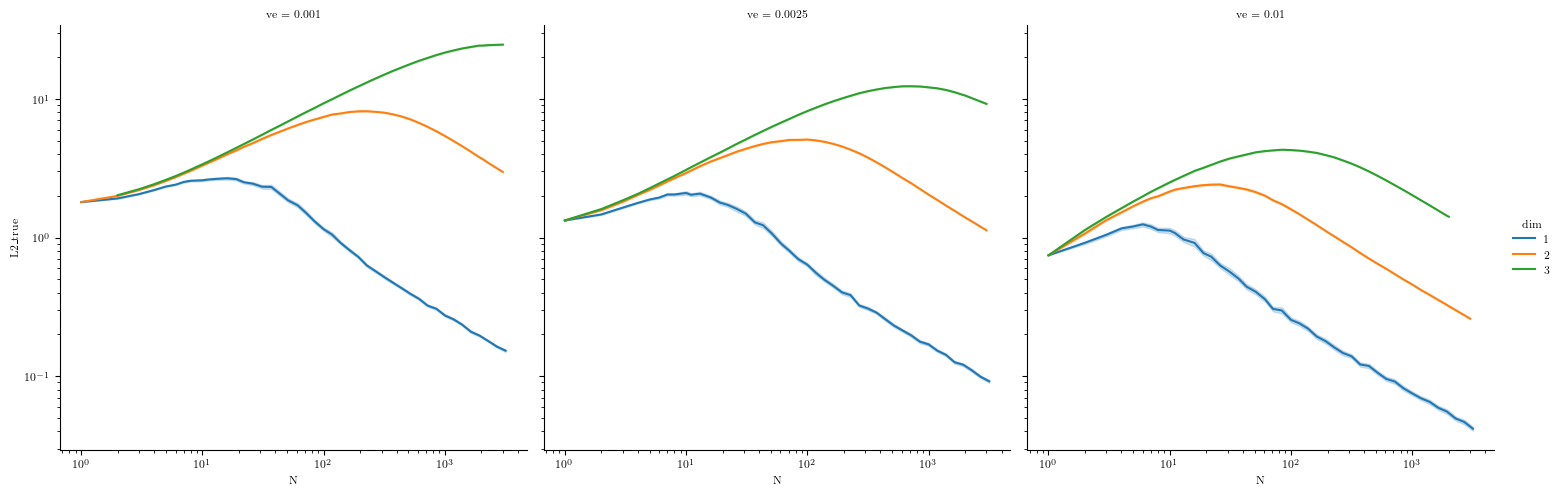

In [15]:
D4 = res[res['std'] == .01]
ax = sns.relplot(D4,x = 'N', y = 'L2_true', hue = 'dim', col = 've',kind = 'line',palette = 'tab10')
ax.set(xscale = 'log')
ax.set(yscale = 'log')